# Navya Devineni - Final Project

In [0]:
# get text data from url
import urllib.request
stringInURL = "https://www.gutenberg.org/files/829/829-0.txt"
urllib.request.urlretrieve(stringInURL, "/tmp/Gullivers.txt")

Out[3]: ('/tmp/Gullivers.txt', <http.client.HTTPMessage at 0x7fab00116f70>)

In [0]:
dbutils.fs.mv("file:/tmp/Gullivers.txt", "dbfs:/data/Gullivers.txt")

Out[4]: True

In [0]:
# transfering the data file into Spark
GulliversRawRDD = sc.textFile("dbfs:/data/Gullivers.txt")

In [0]:
# flatmap each line to words and converting to lower case removing the spaces
GulliversMessyTokensRDD = GulliversRawRDD.flatMap(lambda line: line.lower().strip().split(" "))

In [0]:
# map() words to (words,1) intermediate key-value pairs
import re
GulliversCleanTokensRDD = GulliversMessyTokensRDD.map(lambda letter: re.sub(r'[^A-Za-z]', '', letter))

In [0]:
# removing all the stop words 
from pyspark.ml.feature import StopWordsRemover
remover = StopWordsRemover()
stopwords = remover.getStopWords()
GulliversWordsRDD = GulliversCleanTokensRDD.filter(lambda Word: Word not in stopwords)

In [0]:
# removing all empty spaces
GulliversEmptyRemoveRDD = GulliversWordsRDD.filter(lambda Word: Word != "")

In [0]:
# map() words to (word,1) immediate key-value pairs
IKVPairsRDD = GulliversEmptyRemoveRDD.map(lambda Word: (Word,1))
# using reduceByKey() to get (word,count) results
GulliversWordCountRDD = IKVPairsRDD.reduceByKey(lambda acc, value: acc + value)

In [0]:
GulliversResults = GulliversWordCountRDD.map(lambda x: (x[1], x[0])).sortByKey(False).take(10)
print(GulliversResults)

[(393, 'upon'), (297, 'great'), (279, 'one'), (252, 'two'), (228, 'made'), (212, 'much'), (207, 'country'), (186, 'several'), (168, 'three'), (168, 'time')]

In [0]:
#collect() action to get back to python
results = GulliversWordCountRDD.collect()
print(results)

[('project', 101), ('gutenberg', 31), ('ebook', 13), ('use', 65), ('anyone', 5), ('anywhere', 2), ('united', 17), ('world', 73), ('restrictions', 2), ('whatsoever', 6), ('may', 87), ('give', 81), ('away', 26), ('reuse', 2), ('online', 4), ('check', 4), ('country', 207), ('using', 14), ('title', 14), ('several', 186), ('remote', 15), ('nations', 17), ('february', 3), ('april', 8), ('language', 57), ('set', 79), ('encoding', 1), ('utf', 1), ('produced', 14), ('price', 5), ('start', 5), ('st', 6), ('published', 5), ('contents', 1), ('letter', 14), ('gulliver', 7), ('sympson', 3), ('voyage', 45), ('brobdingnag', 4), ('iii', 7), ('japan', 16), ('iv', 7), ('houyhnhnms', 67), ('edition', 3), ('mr', 13), ('ancient', 17), ('intimate', 4), ('relation', 11), ('us', 121), ('three', 168), ('years', 78), ('ago', 10), ('weary', 12), ('curious', 24), ('house', 80), ('redriff', 8), ('purchase', 4), ('convenient', 25), ('near', 63), ('nottinghamshire', 3), ('native', 16), ('retired', 6), ('yet', 79), ('good', 112), ('neighbours', 10), ('although', 102), ('father', 12), ('dwelt', 4), ('heard', 57), ('say', 33), ('family', 46), ('came', 141), ('confirm', 3), ('churchyard', 1), ('banbury', 1), ('monuments', 1), ('quitted', 2), ('custody', 1), ('following', 18), ('papers', 5), ('think', 43), ('carefully', 5), ('perused', 4), ('style', 15), ('simple', 5), ('fault', 5), ('apparent', 1), ('indeed', 64), ('affirmed', 5), ('true', 23), ('spoken', 5), ('send', 9), ('young', 55), ('common', 55), ('politics', 9), ('large', 71), ('passages', 4), ('relating', 9), ('tides', 1), ('bearings', 1), ('voyages', 11), ('management', 10), ('storms', 1), ('account', 73), ('longitudes', 1), ('latitudes', 1), ('apprehend', 6), ('work', 79), ('possible', 22), ('capacity', 9), ('readers', 9), ('however', 93), ('sea', 70), ('led', 10), ('commit', 2), ('traveller', 6), ('curiosity', 25), ('ready', 36), ('gratify', 6), ('satisfaction', 13), ('book', 11), ('year', 17), ('publicly', 4), ('urgency', 3), ('publish', 4), ('loose', 11), ('directions', 6), ('hire', 5), ('gentleman', 8), ('university', 1), ('put', 95), ('correct', 4), ('dampier', 1), ('round', 41), ('gave', 103), ('power', 25), ('latter', 16), ('kind', 52), ('particularly', 14), ('paragraph', 14), ('queen', 47), ('anne', 2), ('pious', 2), ('glorious', 2), ('human', 35), ('interpolator', 1), ('considered', 13), ('decent', 2), ('praise', 8), ('master', 134), ('houyhnhnm', 19), ('altogether', 22), ('knowledge', 26), ('england', 45), ('govern', 8), ('chief', 18), ('minister', 24), ('even', 22), ('two', 252), ('successively', 2), ('whereof', 52), ('godolphin', 1), ('projectors', 7), ('discourse', 25), ('material', 3), ('circumstances', 11), ('changed', 5), ('know', 56), ('hinted', 1), ('something', 15), ('pleased', 53), ('offence', 6), ('punish', 5), ('looked', 29), ('like', 112), ('innuendo', 1), ('call', 30), ('pray', 2), ('spoke', 37), ('thousand', 53), ('distance', 40), ('applied', 16), ('yahoos', 104), ('said', 124), ('especially', 20), ('thought', 76), ('feared', 4), ('living', 19), ('complain', 6), ('carried', 47), ('brutes', 15), ('rational', 16), ('creatures', 18), ('retirement', 1), ('hither', 4), ('thus', 38), ('proper', 28), ('tell', 31), ('upon', 393), ('others', 59), ('opinion', 47), ('suffer', 18), ('bring', 16), ('mind', 43), ('consider', 6), ('public', 43), ('incapable', 6), ('amendment', 3), ('proved', 4), ('instead', 9), ('seeing', 20), ('full', 53), ('stop', 6), ('abuses', 1), ('corruptions', 11), ('behold', 8), ('months', 30), ('single', 7), ('effect', 12), ('intentions', 3), ('let', 75), ('judges', 11), ('pleaders', 1), ('modest', 4), ('smithfield', 1), ('blazing', 2), ('pyramids', 1), ('law', 35), ('books', 16), ('nobilitys', 1), ('physicians', 6), ('banished', 4), ('female', 16), ('virtue', 26), ('honour', 75), ('ministers', 22), ('thoroughly', 5), ('swept', 1), ('learning', 31), ('rewarded', 4), ('disgracers', 1), ('verse', 1), ('thirst', 3), ('ink', 4), ('reformations', 1), ('deducible', 1), ('m

In [0]:
sorted_results = sorted(results, key=lambda t: t[1], reverse=True)[:45]
print(sorted_results)

[('upon', 393), ('great', 297), ('one', 279), ('two', 252), ('made', 228), ('much', 212), ('country', 207), ('several', 186), ('three', 168), ('time', 168), ('many', 159), ('well', 157), ('might', 149), ('people', 146), ('first', 143), ('came', 141), ('every', 140), ('among', 135), ('little', 135), ('master', 134), ('without', 134), ('said', 124), ('took', 123), ('us', 121), ('found', 115), ('majesty', 113), ('good', 112), ('like', 112), ('feet', 112), ('hundred', 110), ('must', 107), ('yahoos', 104), ('gave', 103), ('part', 103), ('although', 102), ('project', 101), ('make', 100), ('never', 100), ('often', 100), ('court', 98), ('put', 95), ('manner', 95), ('long', 94), ('observed', 94), ('whole', 94)]

Count Words
0 upon 393
1 great 297
2 one 279
3 two 252
4 made 228
5 much 212
6 country 207
7 several 186
8 three 168
9 time 168
10 many 159
11 well 157
12 might 149
13 people 146
14 first 143
15 came 141
16 every 140
17 among 135
18 little 135
19 master 134
20 without 134
21 said 124
22 took 123
23 us 121
24 found 115
25 majesty 113
26 good 112
27 like 112
28 feet 112
29 hundred 110
30 must 107
31 yahoos 104
32 gave 103
33 part 103
34 although 102
35 project 101
36 make 100
37 never 100
38 often 100
39 court 98
40 put 95
41 manner 95
42 long 94
43 observed 94
44 whole 94
Out[14]:

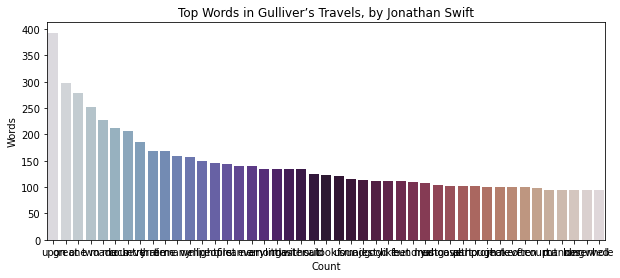

Text(0.5, 1.0, 'Top Words in Gulliver’s Travels, by Jonathan Swift')

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

source = 'Gulliver’s Travels, by Jonathan Swift'
title = 'Top Words in ' + source
xlabel = 'Count'
ylabel = 'Words'

# create Pandas dataframe from list of tuples
df = pd.DataFrame.from_records(sorted_results, columns =[xlabel, ylabel]) 
print(df)

# create plot (using matplotlib)
plt.figure(figsize=(10,4))
sns.barplot(xlabel, ylabel, data=df, palette="twilight").set_title(title)

In [0]:
pip install wordcloud

Python interpreter will be restarted.
Requirement already satisfied: wordcloud in /local_disk0/.ephemeral_nfs/envs/pythonEnv-5733cdab-f7e1-4a78-b803-b10b8b713328/lib/python3.8/site-packages (1.8.1)
Requirement already satisfied: pillow in /local_disk0/.ephemeral_nfs/envs/pythonEnv-5733cdab-f7e1-4a78-b803-b10b8b713328/lib/python3.8/site-packages (from wordcloud) (8.2.0)
Requirement already satisfied: numpy>=1.6.1 in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (1.19.2)
Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (3.2.2)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (1.3.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.4.7)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.8.1)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (0.10.0)
Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.8/site-packages (from python-dateutil>=2.1->matplotlib->wordcloud) (1.15.0)
WARNING: You are using pip version 20.2.4; however, version 21.0.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-5733cdab-f7e1-4a78-b803-b10b8b713328/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data] | 
[nltk_data] | Downloading package cmudict to /root/nltk_data...
[nltk_data] | Package cmudict is already up-to-date!
[nltk_data] | Downloading package gazetteers to /root/nltk_data...
[nltk_data] | Package gazetteers is already up-to-date!
[nltk_data] | Downloading package genesis to /root/nltk_data...
[nltk_data] | Package genesis is already up-to-date!
[nltk_data] | Downloading package gutenberg to /root/nltk_data...
[nltk_data] | Package gutenberg is already up-to-date!
[nltk_data] | Downloading package inaugural to /root/nltk_data...
[nltk_data] | Package inaugural is already up-to-date!
[nltk_data] | Downloading package movie_reviews to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package movie_reviews is already up-to-date!
[nltk_data] | Downloading package names to /root/nltk_data...
[nltk_data] | Package names is already up-to-date!
[nltk_data] | Downloading package shakespeare to /root/nltk_data...
[nltk_data] | Package shakespeare is already up-to-date!
[nltk_data] | Downloading package stopwords to /root/nltk_data...
[nltk_data] | Package stopwords is already up-to-date!
[nltk_data] | Downloading package treebank to /root/nltk_data...
[nltk_data] | Package treebank is already up-to-date!
[nltk_data] | Downloading package twitter_samples to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package twitter_samples is already up-to-date!
[nltk_data] | Downloading package omw to /root/nltk_data...
[nltk_data] | Package omw is already up-to-date!
[nltk_data] | Downloading package wordnet to /root/nltk_data...
[nltk_data] | Package wordnet is already up-to-date!
[nltk_data] | Downloading package wordnet_ic to /root/nltk_data...
[nltk_data] | Package wordnet_ic is already up-to-date!
[nltk_data] | Downloading package words to /root/nltk_data...
[nltk_data] | Package words is already up-to-date!
[nltk_data] | Downloading package maxent_ne_chunker to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package maxent_ne_chunker is already up-to-date!
[nltk_data] | Downloading package punkt to /root/nltk_data...
[nltk_data] | Package punkt is already up-to-date!
[nltk_data] | Downloading package snowball_data to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package snowball_data is already up-to-date!
[nltk_data] | Downloading package averaged_perceptron_tagger to
[nltk_data] | /root/nltk_data...
[nltk_data] | Package averaged_perceptron_tagger is already up-
[nltk_data] | to-date!
[nltk_data] | 
[nltk_data] Done downloading collection popular
Out[1]: True

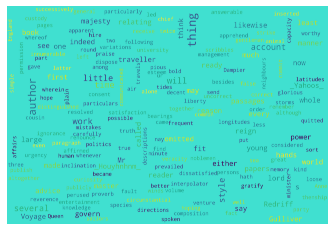

In [0]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("Before he quitted Redriff, he left the custody of the following papers in my hands, with the liberty to dispose of them as I should think fit. I have carefully perused them three times. The style is very plain and simple; and the only fault I find is, that the author, after the manner of travellers, is a little too circumstantial. There is an air of truth apparent through the whole; and indeed the author was so distinguished for his veracity, that it became a sort of proverb among his neighbours at Redriff, when any one affirmed a thing, to say, it was as true as if Mr. Gulliver had spoken it. By the advice of several worthy persons, to whom, with the author’s permission, I communicated these papers, I now venture to send them into the world, hoping they may be, at least for some time, a better entertainment to our young noblemen, than the common scribbles of politics and party. This volume would have been at least twice as large, if I had not made bold to strike out innumerable passages relating to the winds and tides, as well as to the variations and bearings in the several voyages, together with the minute descriptions of the management of thenship in storms, in the style of sailors; likewise the account of longitudes and latitudes; wherein I have reason to apprehend, that Mr. Gulliver may be a little dissatisfied. But I was resolved to fit the work as much as possible to the general capacity of readers. However, if my own ignorance in sea affairs shall have led me to commit some mistakes, I alone am answerable for them. And if any traveller hath a curiosity to see the whole work at large, as it came from the hands of the author, I will be ready to gratify him. As for any further particulars relating to the author, the reader will receive satisfaction from the first pages of the book. I hope you will be ready to own publicly, whenever you shall be called to it, that by your great and frequent urgency you prevailed on me to publish a very loose and uncorrect account of my travels, with directions to hire some young gentleman of either university to put them in order, and correct the style, as my cousin Dampier did, by my advice, in his book called “A Voyage round the world.” But I do not remember I gave you power to consent that any thing should be omitted, and much less that any thing should be inserted; therefore, as to the latter, I do here renounce every thing of that kind; particularly a paragraph about her majesty Queen Anne, of most pious and glorious memory; although I did reverence and esteem her more than any of human species. But you, or your interpolator, ought to have considered, that it was not my inclination, so was it not decent to praise any animal of ur composition before my master _Houyhnhnm_: And besides, the fact was altogether false; for to my knowledge, being in England during some part of her majesty’s reign, she did govern by a chief minister; nay even by two successively, the first whereof was the lord of Godolphin, and the second the lord of Oxford; so that you have made me say the thing that was not. Likewise in the account of the academy of projectors, and several passages of my discourse to my master _Houyhnhnm_, you have either omitted some material circumstances, or minced or changed them in such a manner, that I do hardly know my own work. When I formerly hinted to you something of this in a letter, you were pleased to answer that you were afraid of giving offence; that people in power were very watchful over the press, and apt not only to interpret, but to punish every thing which looked like an _innuendo_ (as I think you call it). But, pray how could that which I spoke so many years ago, and at about five thousand leagues distance, in another reign, be applied to any of the _Yahoos_, who now are said to govern the herd; especially at a time when I little thought, or feared, the unhappiness of living under them? Have not I the most reason to complain, when I see these very _Yahoos_ carried by _Houyhnhnms_ in a vehicle, as if they were brutes, and those the rational creatures? And indeed to avoid so monstrous and detestable a sight was one principal motive of my retirement hither.")

# Create the wordcloud object
wordcloud = WordCloud(width=5600, height=3800, max_font_size=200, background_color="turquoise").generate(text)
# plt the image generated by WordCloud class
plt.imshow(wordcloud)       
plt.axis("off")
plt.margins(x=120, y=100)
plt.show()